This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to deep learning for computer vision

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

**Reading in training, validation, test datasets**

* Step 1: Download the compressed dataset
cats_vs_dogs_small.zip from Canvas. Note: this is a slightly different dataset as the book as it contains 2000 pictures for training, 1000 for validation and 1000 (as opposed to 2000) for testing.

* Step 2: Unzip the file onto your local drive.

* Step 3: Upload your unzipped files (all folders and files) to your Google Drive

Instructions: log into your Google Drive using the same google account of your Google Colab. Find the "Colab Notebooks" folder. Drag the cats_vs_dogs_small folder into the "Colab Notebooks" folder. This should upload all subfolders and pictures onto your Google Drive.

* Step 4: mount your Google Drive within Colab using the following code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Step 5: find the path of your datafiles in Google Drive. On the left panel of Colab, Click File -> click folder content -> drive -> ...

For example, my path would look like something in the following: "/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small"

Then you can set the path to your files with the following code:

In [ ]:
import os, shutil, pathlib

new_base_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
print(new_base_dir)


drive/MyDrive/Colab Notebooks/cats_vs_dogs_small


Question 1: Consider the Cats & Dogs example. Start initially with a training sample of 500, a validation sample of 250, and a test sample of 250. Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train1/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train1/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train1/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train1/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train1/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train1/test/dogs


### Building the model

**Model 1**

**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_10 (Rescaling)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using `image_dataset_from_directory` to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a `Dataset`**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 0.4966 - loss: 0.7037 - val_accuracy: 0.5000 - val_loss: 0.6962
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5162 - loss: 0.7170 - val_accuracy: 0.5060 - val_loss: 0.6883
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5403 - loss: 0.6871 - val_accuracy: 0.5760 - val_loss: 0.6817
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5750 - loss: 0.6888 - val_accuracy: 0.5100 - val_loss: 0.6912
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5667 - loss: 0.6801 - val_accuracy: 0.5000 - val_loss: 0.9803
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5714 - loss: 0.7140 - val_accuracy: 0.5620 - val_loss: 0.6697
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6345 - loss: 0.6453 - val_accuracy: 0.6180 - val_loss: 0.7015
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6674 - loss: 0.6423 - val_accuracy: 0.5820 - 

**Displaying curves of loss and accuracy during training**

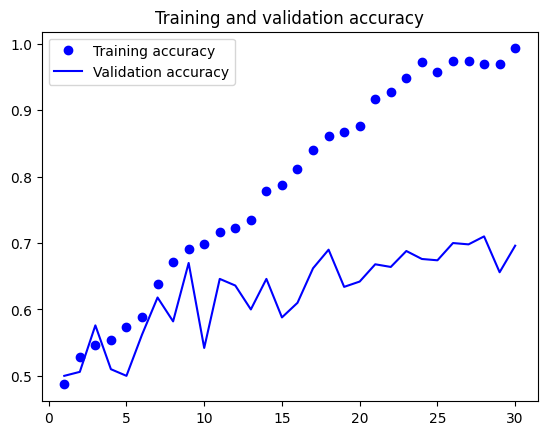

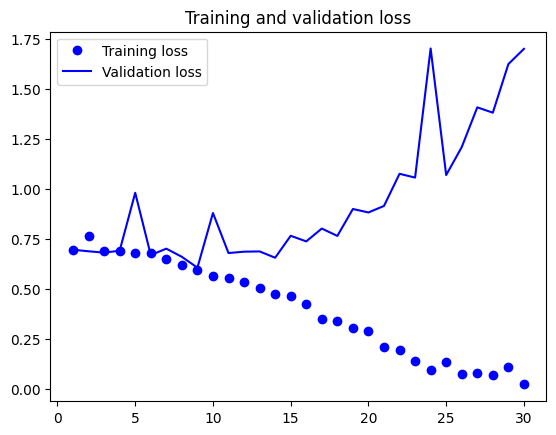

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5756 - loss: 0.6374
Test accuracy: 0.578
Test loss: 0.644


In [ ]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6831 - loss: 0.5857
Validation accuracy: 0.670
Validation loss: 0.607


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

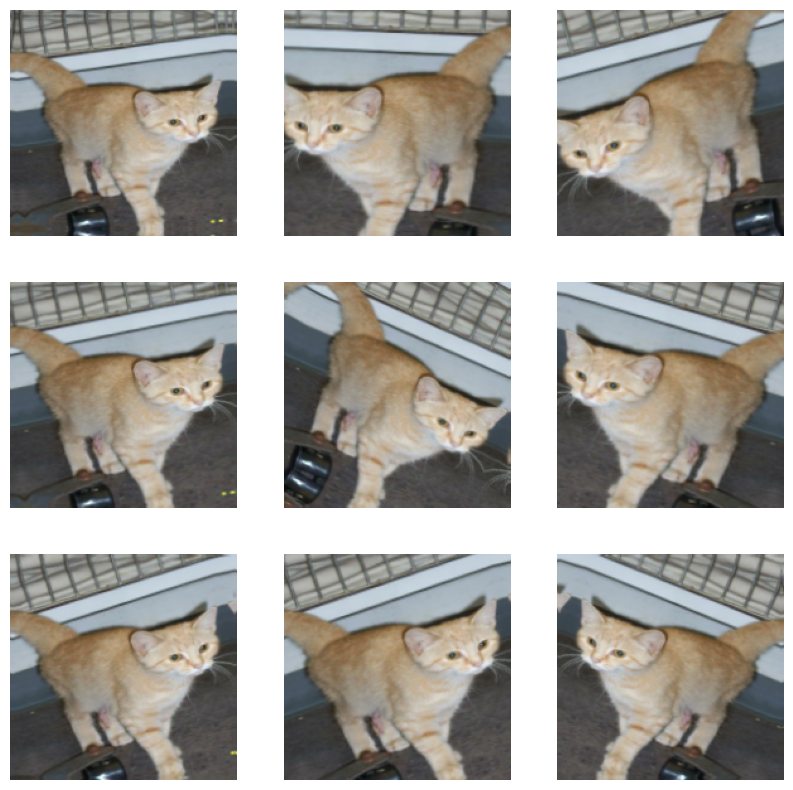

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.4960 - loss: 0.7245 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4934 - loss: 0.6938 - val_accuracy: 0.6240 - val_loss: 0.6920
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5400 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.7224
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5426 - loss: 0.6953 - val_accuracy: 0.5000 - val_loss: 0.7190
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5568 - loss: 0.6976 - val_accuracy: 0.6320 - val_loss: 0.6821
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5593 - loss: 0.6839 - val_accuracy: 0.5020 - val_loss: 0.7440
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5914 - loss: 0.6792 - val_accuracy: 0.5080 - val_loss: 0.7309
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5933 - loss: 0.6673 - val_accuracy: 0.5640 - v

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7555 - loss: 0.5270
Test accuracy: 0.756
Test loss: 0.544


In [ ]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7562 - loss: 0.5043
Validation accuracy: 0.768
Validation loss: 0.498


Question 2 :Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch).What performance did you achieve?

**Model 2**

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=750)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train2/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train2/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train2/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train2/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train2/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train2/test/dogs


**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using image_dataset_from_directory to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the Dataset**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.5229 - loss: 0.7058 - val_accuracy: 0.5140 - val_loss: 0.6901
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5447 - loss: 0.7002 - val_accuracy: 0.5680 - val_loss: 0.6874
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5966 - loss: 0.6779 - val_accuracy: 0.5560 - val_loss: 0.6880
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6151 - loss: 0.6627 - val_accuracy: 0.6040 - val_loss: 0.6612
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6609 - loss: 0.6366 - val_accuracy: 0.6680 - val_loss: 0.6204
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6922 - loss: 0.5971 - val_accuracy: 0.6300 - val_loss: 0.6186
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7109 - loss: 0.5664 - val_accuracy: 0.6360 - val_loss: 0.6505
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7188 - loss: 0.6650 - val_accuracy: 0.6740 - v

**Displaying curves of loss and accuracy during training**

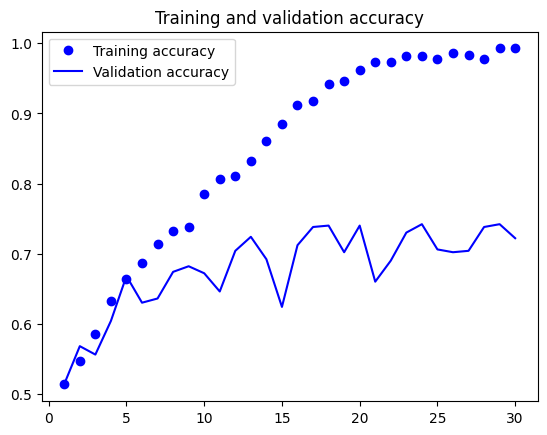

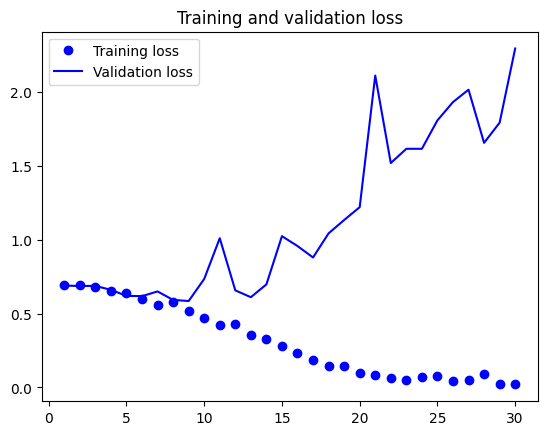

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6779 - loss: 0.5960
Test accuracy: 0.666
Test loss: 0.627


In [ ]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6510 - loss: 0.6049
Validation accuracy: 0.682
Validation loss: 0.585


# Using data augmentation

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

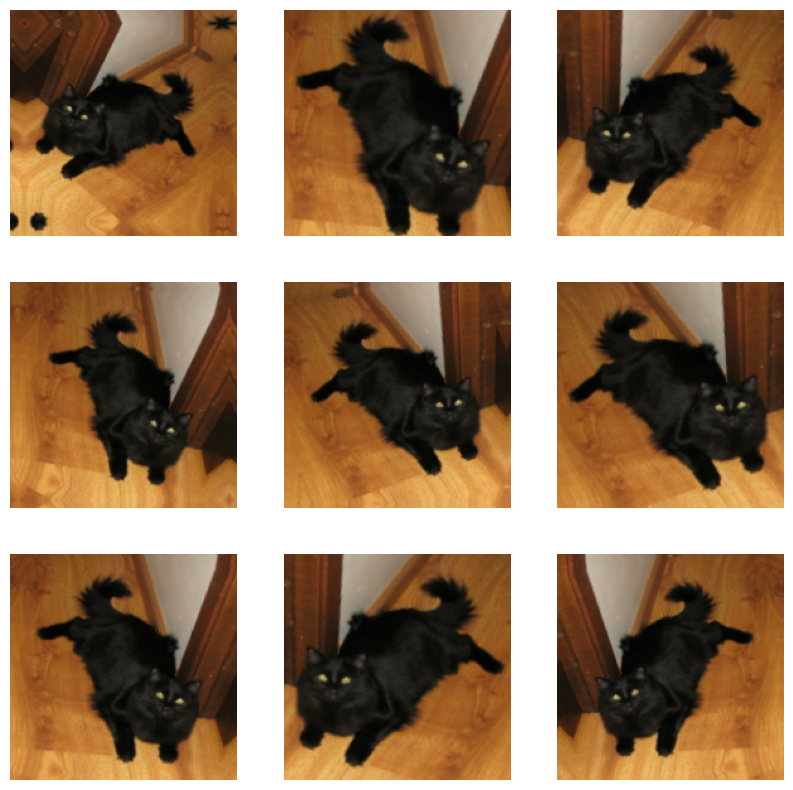

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4892 - loss: 0.7045 - val_accuracy: 0.5000 - val_loss: 0.6912
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5150 - loss: 0.7171 - val_accuracy: 0.5000 - val_loss: 0.6896
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5511 - loss: 0.6884 - val_accuracy: 0.5000 - val_loss: 3.0216
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5942 - loss: 0.9019 - val_accuracy: 0.5180 - val_loss: 0.7110
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6009 - loss: 0.7081 - val_accuracy: 0.5140 - val_loss: 0.6858
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5914 - loss: 0.6687 - val_accuracy: 0.5660 - val_loss: 0.6563
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6307 - loss: 0.6493 - val_accuracy: 0.6920 - val_loss: 0.6405
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6492 - loss: 0.6414 - val_accuracy: 0.6280 - v

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7954 - loss: 0.4712
Test accuracy: 0.774
Test loss: 0.508


In [ ]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7988 - loss: 0.4478
Validation accuracy: 0.802
Validation loss: 0.432


Question 3: Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

**Model 3**

Training has 3000 samples, test has 500 samples and validation has 500 samples.

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
#Training has 3000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1200, end_index=1450)
make_subset("test", start_index=1700, end_index=1950)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train3/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train3/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train3/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train3/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train3/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train3/test/dogs


**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using image_dataset_from_directory to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the Dataset**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.5298 - loss: 0.7266 - val_accuracy: 0.5280 - val_loss: 0.6912
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5188 - loss: 0.6944 - val_accuracy: 0.6020 - val_loss: 0.6740
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5776 - loss: 0.6704 - val_accuracy: 0.5980 - val_loss: 0.6612
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6197 - loss: 0.6459 - val_accuracy: 0.5540 - val_loss: 0.6990
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6587 - loss: 0.6212 - val_accuracy: 0.6580 - val_loss: 0.6118
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6812 - loss: 0.5901 - val_accuracy: 0.6240 - val_loss: 0.6199
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7150 - loss: 0.5452 - val_accuracy: 0.6860 - val_loss: 0.6013
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7493 - loss: 0.5177 - val_accuracy: 0.7020 - va

**Displaying curves of loss and accuracy during training**

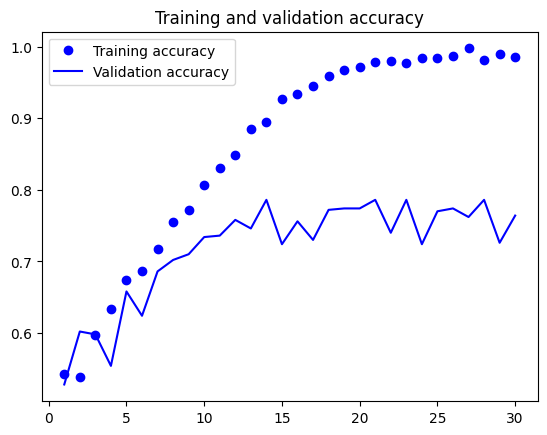

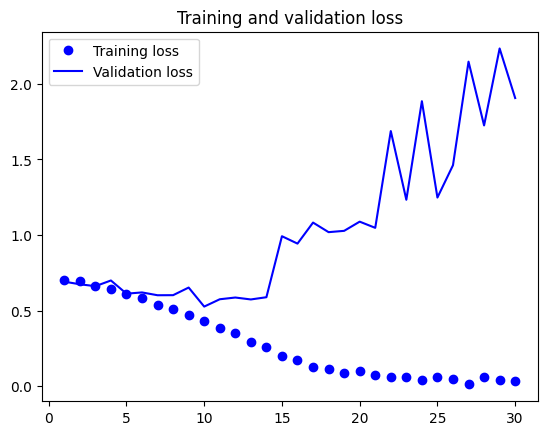

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**



In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6944 - loss: 0.6376
Test accuracy: 0.692
Test loss: 0.637


In [ ]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7129 - loss: 0.5688
Validation accuracy: 0.734
Validation loss: 0.526


#Using data augmentation

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

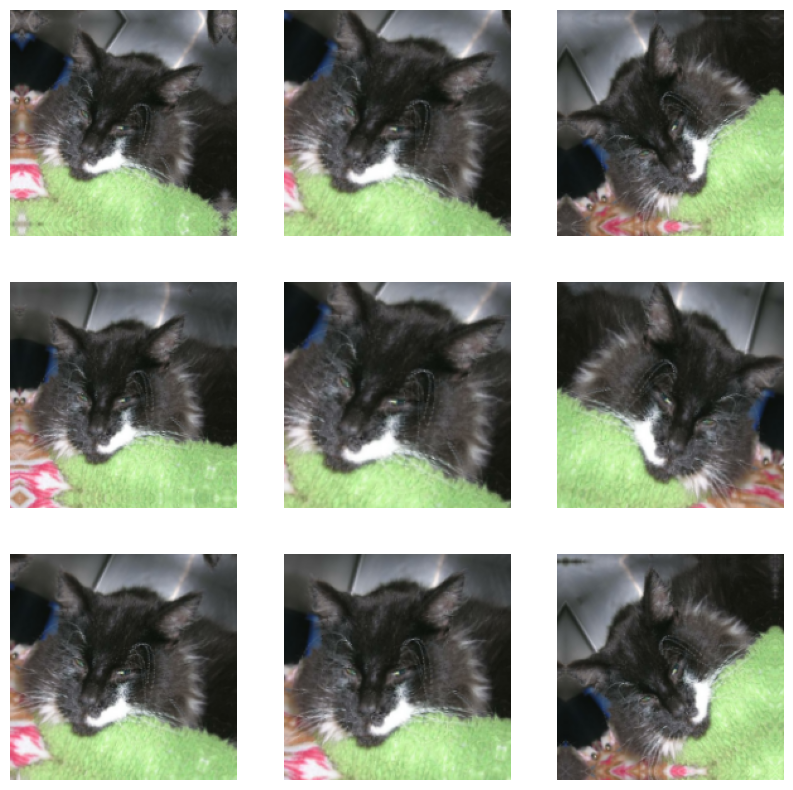

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5173 - loss: 0.8242 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5008 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.7005
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4836 - loss: 0.6955 - val_accuracy: 0.5900 - val_loss: 0.6862
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5245 - loss: 0.6933 - val_accuracy: 0.5360 - val_loss: 0.7069
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6032 - loss: 0.6655 - val_accuracy: 0.5300 - val_loss: 0.7239
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6044 - loss: 0.6613 - val_accuracy: 0.6440 - val_loss: 0.6320
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6295 - loss: 0.6377 - val_accuracy: 0.5880 - val_loss: 0.6678
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6431 - loss: 0.6187 - val_accuracy: 0.6380 - v

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8306 - loss: 0.4891
Test accuracy: 0.822
Test loss: 0.465


In [ ]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8412 - loss: 0.3884
Validation accuracy: 0.820
Validation loss: 0.418


**Model 4**

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train4")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
#Training has 2500 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=850)
make_subset("validation", start_index=1250, end_index=1500)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train4/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train4/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train4/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train4/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train4/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train4/test/dogs


**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_6 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using image_dataset_from_directory to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1700 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the Dataset**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.5335 - loss: 0.6967 - val_accuracy: 0.5880 - val_loss: 0.6929
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5499 - loss: 0.6910 - val_accuracy: 0.5000 - val_loss: 0.7289
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5421 - loss: 0.6922 - val_accuracy: 0.5240 - val_loss: 0.7520
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6093 - loss: 0.6709 - val_accuracy: 0.6240 - val_loss: 0.6369
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6418 - loss: 0.6349 - val_accuracy: 0.6120 - val_loss: 0.6440
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6754 - loss: 0.6178 - val_accuracy: 0.6180 - val_loss: 0.6441
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6518 - loss: 0.6246 - val_accuracy: 0.5440 - val_loss: 1.0188
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6874 - loss: 0.6215 - val_accuracy: 0.6200 - v

**Displaying curves of loss and accuracy during training**

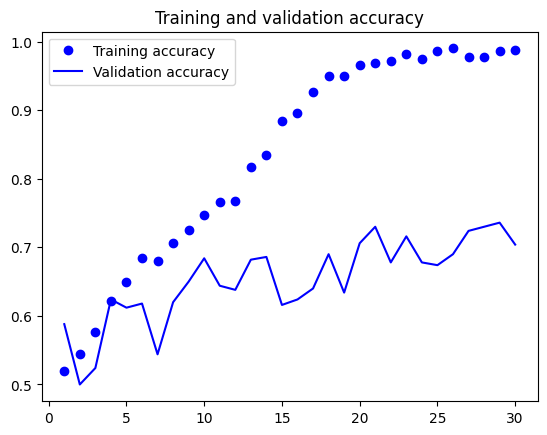

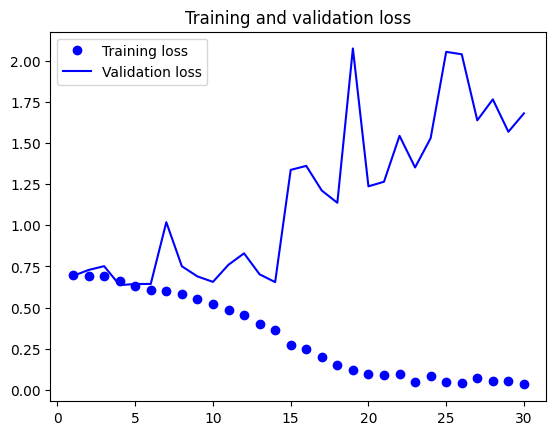

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5874 - loss: 0.6762
Test accuracy: 0.610
Test loss: 0.656


In [ ]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6275 - loss: 0.6302
Validation accuracy: 0.624
Validation loss: 0.637


#Using data augmentation

**Define a data augmentation stage to add to an image model**



In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

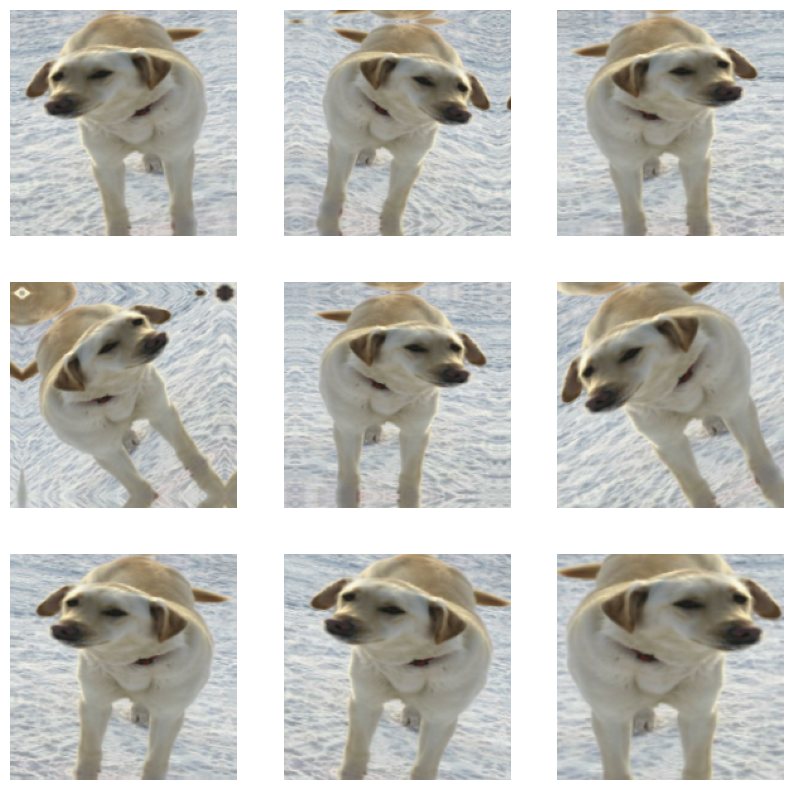

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**



In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5265 - loss: 0.6943 - val_accuracy: 0.4980 - val_loss: 0.6918
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5553 - loss: 0.6975 - val_accuracy: 0.6220 - val_loss: 0.6672
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5660 - loss: 0.6850 - val_accuracy: 0.6060 - val_loss: 0.6577
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6140 - loss: 0.6641 - val_accuracy: 0.6280 - val_loss: 0.6560
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6331 - loss: 0.6495 - val_accuracy: 0.5440 - val_loss: 0.6671
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6417 - loss: 0.6246 - val_accuracy: 0.5240 - val_loss: 0.7912
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6513 - loss: 0.6279 - val_accuracy: 0.5460 - val_loss: 0.6823
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6443 - loss: 0.6262 - val_accuracy: 0.6620 - v

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7606 - loss: 0.5303
Test accuracy: 0.778
Test loss: 0.500


In [ ]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7984 - loss: 0.4425
Validation accuracy: 0.788
Validation loss: 0.455


**Model 5**

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train5")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=300)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train5/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train5/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train5/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train5/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train5/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train5/test/dogs


**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_8 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using image_dataset_from_directory to read images**



In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 600 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the Dataset**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.5342 - loss: 0.7109 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5161 - loss: 0.6932 - val_accuracy: 0.5120 - val_loss: 0.6924
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5440 - loss: 0.6925 - val_accuracy: 0.5100 - val_loss: 0.6910
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5407 - loss: 0.6904 - val_accuracy: 0.5140 - val_loss: 0.6892
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5884 - loss: 0.6858 - val_accuracy: 0.5100 - val_loss: 0.6995
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5833 - loss: 0.6785 - val_accuracy: 0.5100 - val_loss: 0.6896
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6174 - loss: 0.6521 - val_accuracy: 0.6100 - val_loss: 0.6564
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6479 - loss: 0.6217 - val_accuracy: 0.6100 - 

**Displaying curves of loss and accuracy during training**

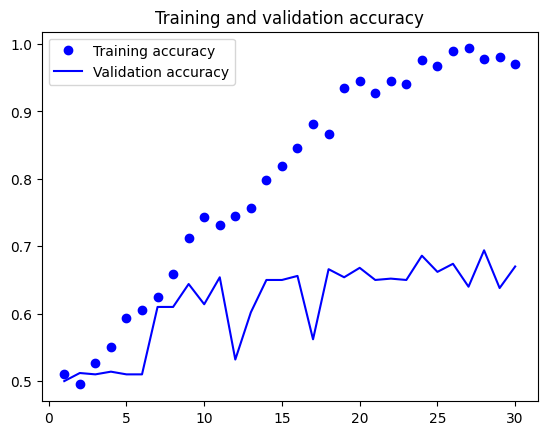

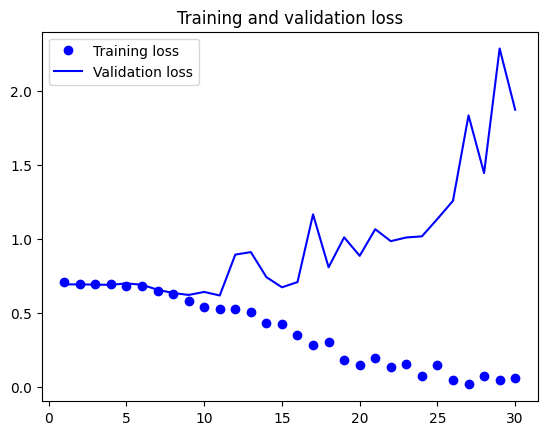

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6184 - loss: 0.6910
Test accuracy: 0.620
Test loss: 0.692


In [ ]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6380 - loss: 0.6327
Validation accuracy: 0.654
Validation loss: 0.617


#Using data augmentation

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

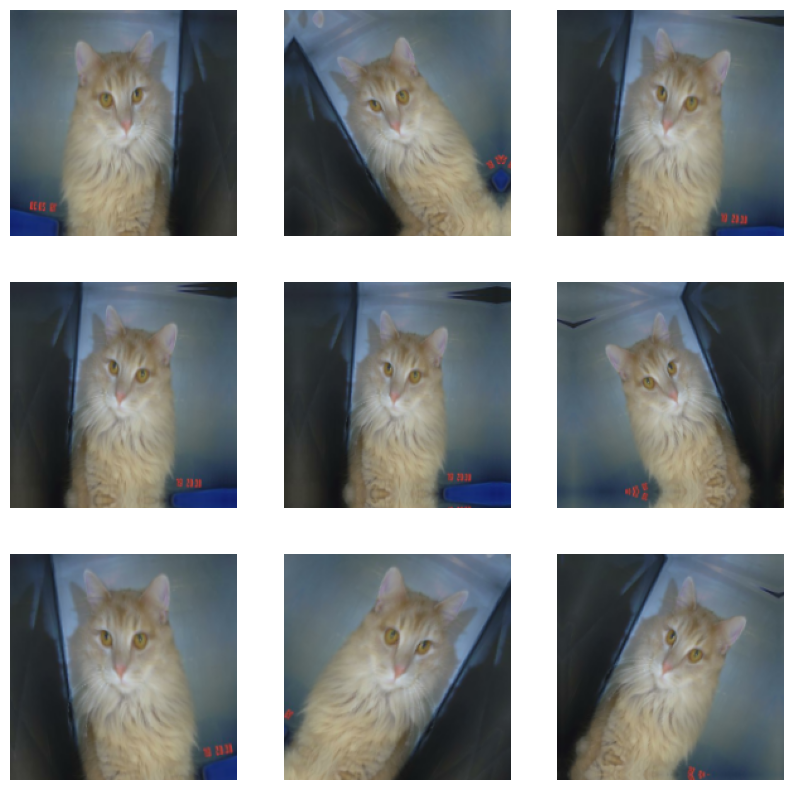

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5579 - loss: 0.6986 - val_accuracy: 0.5040 - val_loss: 0.6923
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5116 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5250 - loss: 0.6935 - val_accuracy: 0.5140 - val_loss: 0.6915
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5225 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5710 - loss: 0.6820 - val_accuracy: 0.5000 - val_loss: 0.8312
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6163 - loss: 0.6651 - val_accuracy: 0.6560 - val_loss: 0.6764
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5439 - loss: 0.6789 - val_accuracy: 0.5460 - val_loss: 0.6931
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6389 - loss: 0.6607 - val_accuracy: 0.6520 - v

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7269 - loss: 0.5637
Test accuracy: 0.710
Test loss: 0.614


In [ ]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7061 - loss: 0.5796
Validation accuracy: 0.726
Validation loss: 0.538


Question 4: Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.

## Leveraging a pretrained model

**Model 6**

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train1/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train1/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train1/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train1/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train1/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train1/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


#Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.7627 - loss: 79.5562 - val_accuracy: 0.9260 - val_loss: 14.2860
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9273 - loss: 9.9919 - val_accuracy: 0.9740 - val_loss: 1.9870
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9578 - loss: 5.3914 - val_accuracy: 0.9760 - val_loss: 4.1417
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9519 - loss: 5.6934 - val_accuracy: 0.9580 - val_loss: 5.3204
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9716 - loss: 2.8037 - val_accuracy: 0.9800 - val_loss: 2.6845
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9687 - loss: 4.0401 - val_accuracy: 0.9640 - val_loss: 4.7620
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9643 - loss: 4.0592 - val_accuracy: 0.9720 - val_loss: 3.6654
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9659 - loss: 4.4371 - val_accuracy: 0.9660 -

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9711 - loss: 3.4911
Test accuracy: 0.968
Test loss: 5.110


In [ ]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9699 - loss: 2.6560
Validation accuracy: 0.974
Validation loss: 1.987


**Model 7**

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_40 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=750)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train2/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train2/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train2/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train2/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train2/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train2/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


#Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8107 - loss: 55.3569 - val_accuracy: 0.9700 - val_loss: 4.3498
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9383 - loss: 9.0229 - val_accuracy: 0.9760 - val_loss: 4.5391
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9612 - loss: 4.6633 - val_accuracy: 0.9820 - val_loss: 3.2516
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9586 - loss: 3.3718 - val_accuracy: 0.9620 - val_loss: 6.2509
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9665 - loss: 3.5553 - val_accuracy: 0.9680 - val_loss: 7.2292
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9671 - loss: 3.9652 - val_accuracy: 0.9740 - val_loss: 4.0186
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9726 - loss: 2.4433 - val_accuracy: 0.9760 - val_loss: 8.0654
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9670 - loss: 3.6926 - val_accuracy: 0.9680 - 

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9611 - loss: 8.2796
Test accuracy: 0.970
Test loss: 6.138


In [ ]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9819 - loss: 1.4705
Validation accuracy: 0.976
Validation loss: 2.840


**Model 8**

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_44 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
#Training has 3000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1200, end_index=1450)
make_subset("test", start_index=1700, end_index=1950)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train3/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train3/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train3/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train3/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train3/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train3/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


#Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**



In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8018 - loss: 51.8908 - val_accuracy: 0.9560 - val_loss: 4.0075
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9406 - loss: 7.5222 - val_accuracy: 0.9520 - val_loss: 7.6473
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9589 - loss: 3.7789 - val_accuracy: 0.9700 - val_loss: 3.6352
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9653 - loss: 4.5100 - val_accuracy: 0.9780 - val_loss: 5.3860
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9716 - loss: 3.9300 - val_accuracy: 0.9860 - val_loss: 1.5405
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9655 - loss: 4.0798 - val_accuracy: 0.9740 - val_loss: 4.0481
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9690 - loss: 4.0671 - val_accuracy: 0.9660 - val_loss: 6.2524
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9751 - loss: 3.6599 - val_accuracy: 0.9760 - 

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9687 - loss: 8.7953
Test accuracy: 0.970
Test loss: 8.022


In [ ]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9839 - loss: 1.1951
Validation accuracy: 0.986
Validation loss: 1.540


**Model 9**

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_57 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train4")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category
        dst_dir = new_base_dir / subset_name / category

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

make_subset("train", start_index=0, end_index=850)
make_subset("validation", start_index=1250, end_index=1500)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train4/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train4/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train4/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train4/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train4/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train4/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1700 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


#Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8419 - loss: 43.5065 - val_accuracy: 0.9200 - val_loss: 14.9086
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9514 - loss: 4.4717 - val_accuracy: 0.9760 - val_loss: 2.8337
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9662 - loss: 4.1001 - val_accuracy: 0.9520 - val_loss: 6.1717
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9643 - loss: 3.3678 - val_accuracy: 0.9760 - val_loss: 2.1064
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9699 - loss: 3.5635 - val_accuracy: 0.9720 - val_loss: 4.3361
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9633 - loss: 4.4406 - val_accuracy: 0.9820 - val_loss: 2.1830
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9764 - loss: 2.5188 - val_accuracy: 0.9780 - val_loss: 2.1939
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9626 - loss: 3.7992 - val_accuracy: 0.9740 -

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9780 - loss: 4.3722
Test accuracy: 0.972
Test loss: 3.671


In [ ]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9790 - loss: 1.7854
Validation accuracy: 0.982
Validation loss: 1.806


**Model 10**

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_61 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train5")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=300)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train5/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train5/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train5/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train5/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train5/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train5/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 600 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


#Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6836 - loss: 92.4067 - val_accuracy: 0.9640 - val_loss: 3.5209
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9618 - loss: 3.6734 - val_accuracy: 0.9800 - val_loss: 2.1756
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9631 - loss: 4.1346 - val_accuracy: 0.9100 - val_loss: 13.9317
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9280 - loss: 8.8680 - val_accuracy: 0.9680 - val_loss: 3.9607
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9812 - loss: 1.2568 - val_accuracy: 0.9620 - val_loss: 3.7449
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9792 - loss: 1.7314 - val_accuracy: 0.9700 - val_loss: 4.3255
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9667 - loss: 2.5103 - val_accuracy: 0.9580 - val_loss: 11.8559
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9825 - loss: 4.5172 - val_accuracy: 0.9780 

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9710 - loss: 3.4185
Test accuracy: 0.958
Test loss: 5.620


In [ ]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9868 - loss: 1.3776
Validation accuracy: 0.980
Validation loss: 2.176
